<a href="https://colab.research.google.com/github/AlinaOtr/data/blob/master/logs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Таблица *users_data*:  
* client - id клиента;
* premium - булева переменная, уточняющая, является ли клиент премиум-клиентом или нет;
* age - возраст клиента.

Таблица *log*:
* client - id клиента;
* success - булева переменная, обозначающая, была ли операция успешной;
* platform - платформа;
* time - время операции.

Задание: проанализировать, от чего зависит успешность операций.

# Предобработка

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
users_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [ ]:
users_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [ ]:
users_data.shape

(2954, 3)

In [ ]:
users_data.columns

Index(['client', 'premium', 'age'], dtype='object')

In [ ]:
users_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [ ]:
users_data.nunique()

client     2954
premium       2
age          50
dtype: int64

Пропусков в данных таблицы с пользователями нет, дубликатов тоже (число уникальных клиентов = числу строк в таблице), названия столбцов соответствуют стандарту.

In [ ]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [ ]:
logs.shape

(4500, 4)

In [ ]:
logs.columns

Index(['client', 'success', 'platform', 'time'], dtype='object')

In [ ]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [ ]:
logs.duplicated().sum()

0

Пропусков и дубликатов в данных нет, названия столбцов соответствуют стандарту.

# Анализ

In [ ]:
users_data.age.describe()

count    2954.000000
mean       44.196005
std        14.248336
min        20.000000
25%        32.000000
50%        44.000000
75%        56.000000
max        69.000000
Name: age, dtype: float64

В таблице представлены клиенты от 20 до 69 лет. Средний возраст - 44 года.

In [ ]:
users_data['age_group'] = pd.cut (users_data['age'], 5)

In [ ]:
users_data.merge(logs).groupby('age_group').success.agg(['count', 'sum'])

,count,sum
age_group,,
"(19.951, 29.8]",774,587
"(29.8, 39.6]",657,482
"(39.6, 49.4]",688,497
"(49.4, 59.2]",622,459
"(59.2, 69.0]",698,522


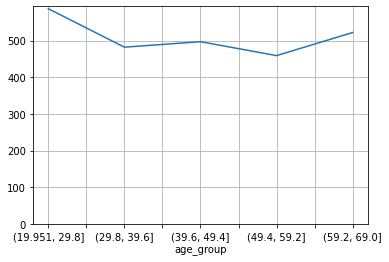

In [ ]:
users_data.merge(logs).groupby('age_group').success.agg('sum').plot(ylim = 0, grid = True)

Пользователи до 30 лет чаще совершают успешные операции.

In [ ]:
round(users_data.query('premium == 1').premium.count() / users_data.premium.count() * 100, 2)

13.74

13,74% клиентов в нашей базе являются премиальными. Предположительно, они должны совершать больше всего успешных операций.

In [ ]:
users_data.merge(logs).groupby('premium')['success'].agg(['count', 'sum'])

,count,sum
premium,,
False,3019,2244
True,420,303


In [ ]:
round(users_data.merge(logs).query('premium == 1').success.sum() / users_data.merge(logs).success.sum() * 100, 2)

11.9

Только 11,9% успешных операций приходится на долю премиальных клиентов. Это меньше, чем доля премиальных клиентов в общем числе клиентов. Гипотеза о том, что премиальные клиенты совершают наибольшее количество успешных операций не подтвердилась.

In [ ]:
users_data.merge(logs).groupby('premium')['success'].agg('sum') / users_data.merge(logs).groupby('premium')['success'].agg('count')

premium
False    0.743292
True     0.721429
Name: success, dtype: float64

Процент успешных операций от общего числа операций в обеих группах пользователей (премиум или нет) примерно одинаковый (немного выше 70%).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


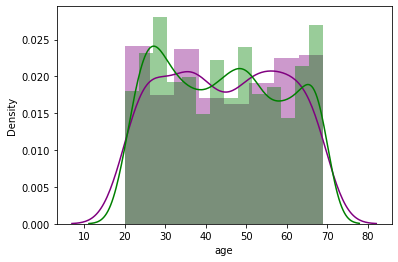

In [ ]:
sns.distplot(users_data.merge(logs).query('premium == True').age, color = 'purple')
sns.distplot(users_data.merge(logs).query('premium == False').age, color = 'green')

Зависимости между возрастом и премиальностью клиента не видно.

In [ ]:
logs.platform.value_counts()

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

В таблице представлены 3 типа платформ: телефон, компьютер и планшет. Телефон используется почти в 2 раза чаще компьютера и более чем в 10 раз чаще планшета.

In [ ]:
logs.query('success == True').platform.value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

In [ ]:
logs.query('success == True').platform.value_counts() / logs.platform.value_counts()

phone       0.733382
computer    0.724252
tablet      0.743802
Name: platform, dtype: float64

Больше всего успешных операций совершено на телефоне, поскольку пользователи в выборке чаще использовали телефон. Но процент успешных операций от всех на трёх разных платформах примерно одинаковый!

In [ ]:
users_data.merge(logs).query('premium == True and success == True').platform.value_counts()

phone       177
computer    108
tablet       18
Name: platform, dtype: int64

In [ ]:
users_data.merge(logs).query('premium == True and success == True').platform.value_counts() / users_data.merge(logs).query('premium == True').platform.value_counts()

phone       0.719512
computer    0.720000
tablet      0.750000
Name: platform, dtype: float64

Премиальные клиенты также совершают операции преимущественно с телефона, в том числе успешные. Но процент успешных операций с разных устройств примерно одинаков и даже с планшета немного выше (75% против 72%).

In [ ]:
computer_success = users_data.merge(logs).query('platform == "computer" and success == True')

In [ ]:
computer_success['age_group'] = pd.cut(computer_success['age'], 5)
computer_success.head()

,client,premium,age,success,platform,time,age_group
3,11989,False,44,True,computer,1585403698,"(39.6, 49.4]"
12,32406,False,24,True,computer,1585479382,"(19.951, 29.8]"
14,62404,False,40,True,computer,1585430097,"(39.6, 49.4]"
20,68848,False,35,True,computer,1585440553,"(29.8, 39.6]"
26,49675,False,48,True,computer,1585402108,"(39.6, 49.4]"


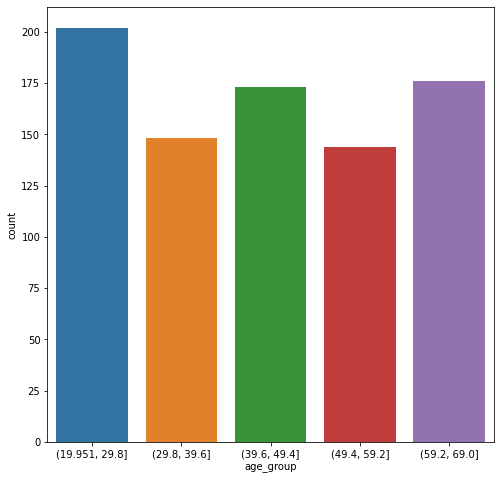

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x="age_group", data = computer_success)

Больше всего успешных операций с компьютера совершили клиенты до 30 лет.

In [ ]:
phone_success = users_data.merge(logs).query('platform == "phone" and success == True')

In [ ]:
phone_success['age_group'] = pd.cut(phone_success['age'], 10)
phone_success.head(5)

,client,premium,age,success,platform,time,age_group
0,46346,False,58,True,phone,1585452839,"(54.3, 59.2]"
4,60664,False,49,True,phone,1585406918,"(44.5, 49.4]"
8,77451,False,49,True,phone,1585444298,"(44.5, 49.4]"
9,35036,False,48,True,phone,1585465012,"(44.5, 49.4]"
13,78648,False,44,True,phone,1585408731,"(39.6, 44.5]"


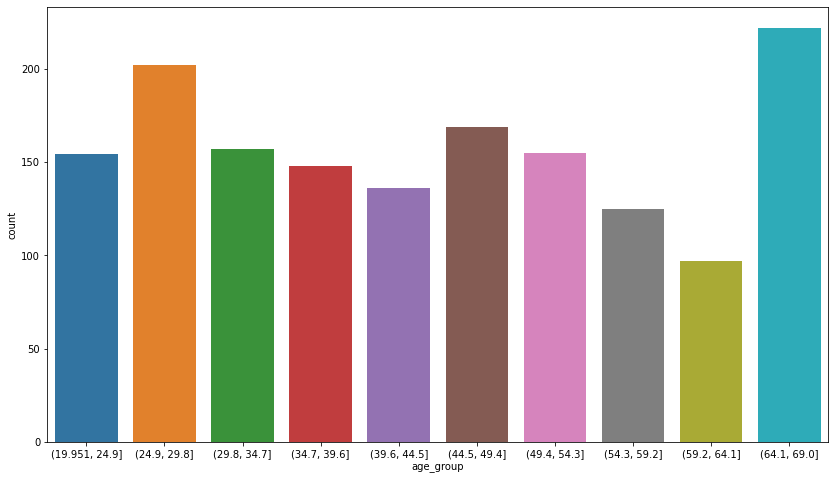

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(x="age_group", data = phone_success)

Многие пожилые люди совершают операции с телефона.

In [ ]:
tablet_success = users_data.merge(logs).query('platform == "tablet" and success == True')

In [ ]:
tablet_success['age_group'] = pd.cut(tablet_success['age'], 5)
tablet_success.head(5)

,client,premium,age,success,platform,time,age_group
5,78605,False,36,True,tablet,1585430330,"(29.8, 39.6]"
11,61559,False,59,True,tablet,1585467141,"(49.4, 59.2]"
57,40,False,52,True,tablet,1585419674,"(49.4, 59.2]"
85,89058,False,66,True,tablet,1585400823,"(59.2, 69.0]"
99,25003,True,57,True,tablet,1585442628,"(49.4, 59.2]"


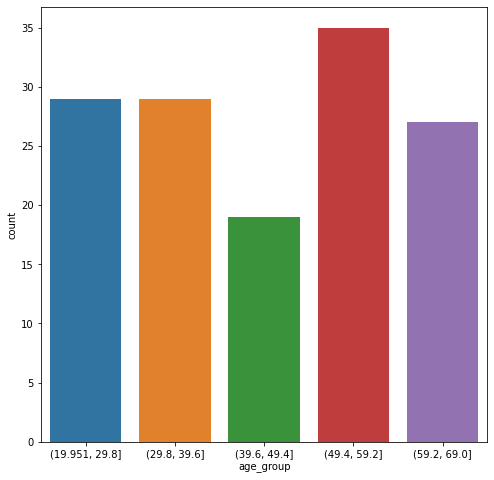

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x="age_group", data = tablet_success)

Планшетом больше пользуются люди от 50 до 60 лет.



In [ ]:
time.ctime(logs.time.min())

'Sat Mar 28 12:53:22 2020'

In [ ]:
time.ctime(logs.time.max())

'Sun Mar 29 11:06:20 2020'

In [ ]:
logs['time_group'] = pd.cut(logs['time'], 5)

In [ ]:
users_data.merge(logs).groupby('time_group').success.agg(['count', 'sum'])

,count,sum
time_group,,
"(1585399922.022, 1585415997.6]",698,518
"(1585415997.6, 1585431993.2]",672,486
"(1585431993.2, 1585447988.8]",680,492
"(1585447988.8, 1585463984.4]",672,491
"(1585463984.4, 1585479980.0]",717,560


In [ ]:
time.ctime(1585463984.4)

'Sun Mar 29 06:39:44 2020'

28 марта активность пользователей в разное время сильно не отличалась. Утром 29 марта количество успешных операций было больше. Возможно утром совершается больше операций (когда люди едут на работу или когда у них начинается рабочий день). Или больше пользователей по прошествию суток стали пользоваться продуктом. Нужно будет отследить дальнейшую динамику, когда появятся данные.

In [ ]:
success_number = logs.query('success == True') \
    .groupby('client') \
    .agg({'success': 'count'}) \
    .rename(columns={'success': 'success_number'})  \
    .sort_values('success_number', ascending = False)

In [ ]:
success_number.head()

,success_number
client,
12179,41
61468,41
52870,41
61473,41
92584,41


In [ ]:
maximum_success = success_number.success_number.max()

In [ ]:
list_success_number = success_number.query('success_number == @maximum_success') \
    .sort_values('client') \
    .client \
    .tolist()
list_success_number

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [ ]:
", ".join(str(number) for number in list_success_number)

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

Несколько пользователей совершили 41 успешную операцию. Это максимальное число успешных операций, приходящихся на одного пользователя.

In [ ]:
success_clients = users_data.query('client in  @list_success_number')
success_clients

,client,premium,age
139,82563,False,28
240,92584,False,28
300,61468,False,25
680,28719,False,52
1319,61473,False,69
1426,78349,False,68
1708,36165,False,65
2472,12179,False,32
2837,52870,False,24


Пользователи, которые совершили наибольшее число операций, не являются премиальными. В список клиентов с максимальным числом успешных операций не попали клиенты среднего возраста.

In [ ]:
success_number.success_number.value_counts()

1     2791
2       43
41       9
40       1
3        1
Name: success_number, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


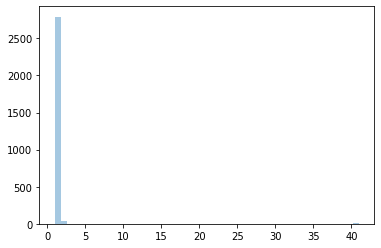

In [ ]:
sns.distplot(success_number, kde = False)

Большинство пользователей совершили не более 3 успешных операций, преимущественно всего 1 операцию! При этом есть пользователи, которые совершили 40 или 41 операцию. Но такие клиенты составляют очень маленькую долю.

In [ ]:
success_number.query('success_number > 3')

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41
1826,64064,40


In [ ]:
users_data.query('client == 64064')

,client,premium,age
109,64064,False,49


Клиент, совершивший 40 успешных операций, по характеристикам схож с теми, кто совершил 41 операцию.

In [ ]:
round(success_number.query('success_number > 3').success_number.count() / success_number.success_number.count() * 100, 2)

0.35

Менее 1% клиенов совершило больше 3 успешных операций. Нужно обратить на них особое внимание! Это либо самые лояльные клиенты, которые в разы чаще пользуются нашим сервисов, чем остальные. Либо какие-то непонятные выбросы, возникновение которых надо исследовать. Например, это боты. Исследую выборку тех пользователей, кто совершал до 3 операций включительно.

In [ ]:
part_clients = success_number.query('success_number < 3')

In [ ]:
part_clients.reset_index(level=0, inplace=True)

In [ ]:
part_clients = part_clients.merge(users_data)

In [ ]:
part_clients['age_group'] = pd.cut(part_clients['age'], 5)

In [ ]:
part_clients.merge(logs).groupby('age_group').success.agg(['count', 'sum'])

,count,sum
age_group,,
"(19.951, 29.8]",426,423
"(29.8, 39.6]",446,438
"(39.6, 49.4]",461,457
"(49.4, 59.2]",428,418
"(59.2, 69.0]",407,399


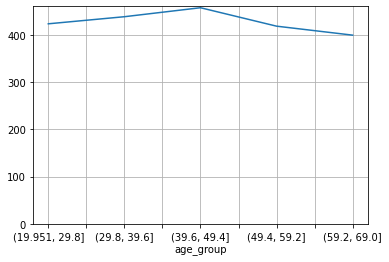

In [ ]:
part_clients.merge(logs).groupby('age_group').success.agg('sum').plot(ylim = 0, grid = True)

В новой выборке, очищенной от выбросов, больше операций было совершено в группе среднего возраста (40 - 50 лет).

In [ ]:
round(part_clients.query('premium == 1').premium.count() / part_clients.premium.count() * 100, 2)

14.05

In [ ]:
part_clients.merge(logs).groupby('premium')['success'].agg(['count', 'sum'])

,count,sum
premium,,
False,1861,1832
True,307,303


In [ ]:
round(part_clients.merge(logs).query('premium == 1').success.sum() / part_clients.merge(logs).success.sum() * 100, 2)

14.19

В очищенной выборке 14% премиальных клиентов и на них приходится 14% успешных операций. То есть премиальные клиенты совершают успешных операций не больше, чем другие пользователи.

In [ ]:
logs['time_group'] = pd.cut(logs['time'], 5)

In [ ]:
part_clients.merge(logs).groupby('time_group').success.agg(['count', 'sum'])

,count,sum
time_group,,
"(1585399922.022, 1585415997.6]",438,432
"(1585415997.6, 1585431993.2]",410,402
"(1585431993.2, 1585447988.8]",422,416
"(1585447988.8, 1585463984.4]",416,410
"(1585463984.4, 1585479980.0]",482,475


В этой выборке также утром 29 марта было совершено больше успешных операций, чем в другие промежутки времени 28 марта.

In [ ]:
part_clients.merge(logs).platform.value_counts()

phone       1324
computer     719
tablet       125
Name: platform, dtype: int64

Телефон используется почти в 2 раза чаще компьютера и более чем в 10 раз чаще планшета.

In [ ]:
computer_success = part_clients.merge(logs).query('platform == "computer" and success == True')

In [ ]:
computer_success['age_group'] = pd.cut(computer_success['age'], 5)
computer_success.head()

,client,success_number,premium,age,age_group,success,platform,time,time_group
1,51091,2,False,39,"(29.8, 39.6]",True,computer,1585474242,"(1585463984.4, 1585479980.0]"
2,77164,2,False,67,"(59.2, 69.0]",True,computer,1585448159,"(1585447988.8, 1585463984.4]"
5,96108,2,False,44,"(39.6, 49.4]",True,computer,1585450554,"(1585447988.8, 1585463984.4]"
9,19079,2,False,26,"(19.951, 29.8]",True,computer,1585426865,"(1585415997.6, 1585431993.2]"
11,2249,2,True,52,"(49.4, 59.2]",True,computer,1585423126,"(1585415997.6, 1585431993.2]"


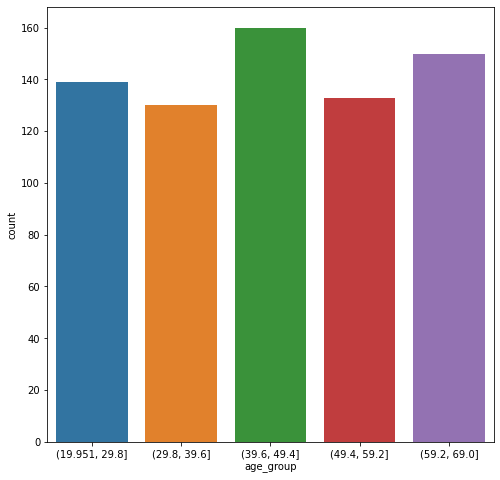

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x="age_group", data = computer_success)

Больше всего успешных операций с компьютера совершили клиенты 40-50 лет.

In [ ]:
phone_success = part_clients.merge(logs).query('platform == "phone" and success == True')

In [ ]:
phone_success['age_group'] = pd.cut(phone_success['age'], 5)
phone_success.head(5)

,client,success_number,premium,age,age_group,success,platform,time,time_group
0,51091,2,False,39,"(29.8, 39.6]",True,phone,1585479980,"(1585463984.4, 1585479980.0]"
3,77164,2,False,67,"(59.2, 69.0]",True,phone,1585462958,"(1585447988.8, 1585463984.4]"
4,96108,2,False,44,"(39.6, 49.4]",True,phone,1585435487,"(1585431993.2, 1585447988.8]"
6,3936,2,False,61,"(59.2, 69.0]",True,phone,1585422941,"(1585415997.6, 1585431993.2]"
7,3936,2,False,61,"(59.2, 69.0]",True,phone,1585472895,"(1585463984.4, 1585479980.0]"


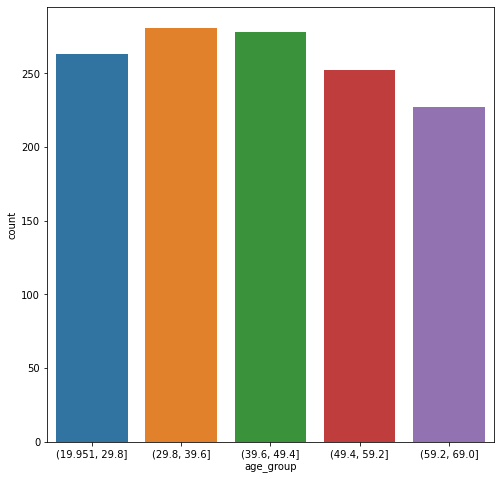

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x="age_group", data = phone_success)

Клиенты пожилого возраста реже пользуются телефоном.

In [ ]:
tablet_success = part_clients.merge(logs).query('platform == "tablet" and success == True')

In [ ]:
tablet_success['age_group'] = pd.cut(tablet_success['age'], 5)
tablet_success.head(5)

,client,success_number,premium,age,age_group,success,platform,time,time_group
35,92743,2,False,22,"(19.951, 29.8]",True,tablet,1585408975,"(1585399922.022, 1585415997.6]"
38,6888,2,False,60,"(59.2, 69.0]",True,tablet,1585401567,"(1585399922.022, 1585415997.6]"
47,46918,2,False,44,"(39.6, 49.4]",True,tablet,1585449401,"(1585447988.8, 1585463984.4]"
48,17737,2,False,44,"(39.6, 49.4]",True,tablet,1585440263,"(1585431993.2, 1585447988.8]"
84,63791,2,True,34,"(29.8, 39.6]",True,tablet,1585429843,"(1585415997.6, 1585431993.2]"


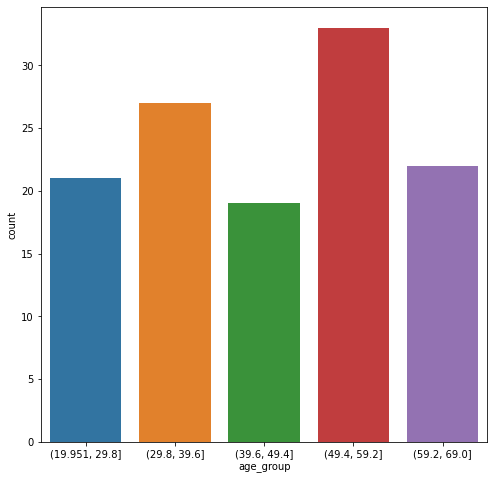

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x="age_group", data = tablet_success)

Планшетом больше пользуются люди от 50 до 60 лет.

